In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from RachbaJunction import RachbaJunction
from RachbaJunction.utilities import *
from RachbaJunction.ScatteringMatrix import ScatteringMatrix

BASE_PATH = "plots/Report/" 
SECTION_1 = "homogeneous_case/"
SECTION_2 = "inhomogeneous_case/"

ModuleNotFoundError: No module named 'RachbaJunction'

# hologeneous case

## dispersion relation

* add the arrow for the magnetic gap

<IPython.core.display.Javascript object>


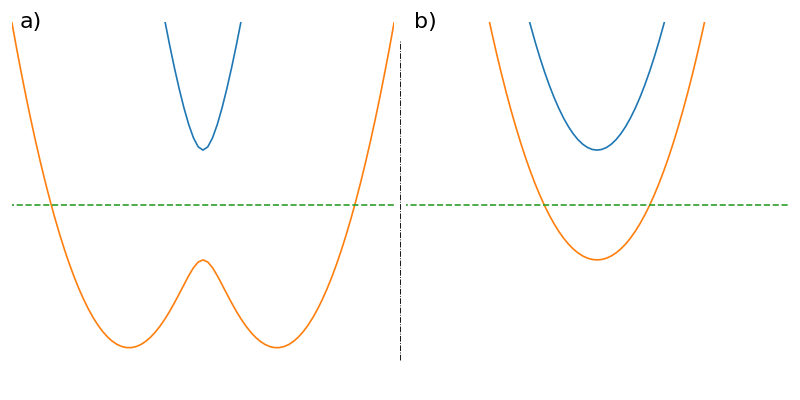

In [3]:
%matplotlib notebook
# plt.rcParams['text.usetex'] = True

eso = 10
f_p = lambda ep_0, ee: ep_0**2 + np.sqrt(1 + ee*ep_0**2)
f_m = lambda ep_0, ee: ep_0**2 - np.sqrt(1 + ee*ep_0**2)



r = np.arange(-10, 10, 0.1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=100, tight_layout=True, facecolor=None)

hh = 0.3
y_lim = [-1, 1]
x_lim = [-4, 4]

axs[0].plot(r, [hh*f_p(i, 10) for i in r])
axs[0].plot(r, [hh*f_m(i, 10) for i in r])
axs[0].plot(r, [0 for i in r], linestyle = "dashed")
axs[0].text(0.05, 1, "a)", fontsize=20, horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
 

axs[0].set_xlim(x_lim[0], x_lim[1])
axs[0].set_ylim(y_lim[0], y_lim[1])

axs[1].plot(r, [hh*f_p(i, 0.4) for i in r])
axs[1].plot(r, [hh*f_m(i, 0.4) for i in r])
axs[1].plot(r, [0 for i in r], linestyle = "dashed")
axs[1].text(0.05, 1, "b)", fontsize=20, horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

axs[1].set_xlim(x_lim[0], x_lim[1])
axs[1].set_ylim(y_lim[0], y_lim[1])

axs[0].set_xticks([])
axs[0].set_yticks([])  
axs[0].axis('off')

axs[1].set_xticks([])
axs[1].set_yticks([])  
axs[1].axis('off')

line = plt.Line2D((.5,.5),(.1,.9), color="k", linewidth=0.8, linestyle="dashdot")
fig.add_artist(line)

# plt.savefig("plots/Report/dispersion_rel.pdf", transparent = True)
plt.savefig(BASE_PATH+SECTION_1+"dispersion_rel.pdf", transparent = True)

plt.show()

## Dispersion relation: Dirac dilemma

<IPython.core.display.Javascript object>


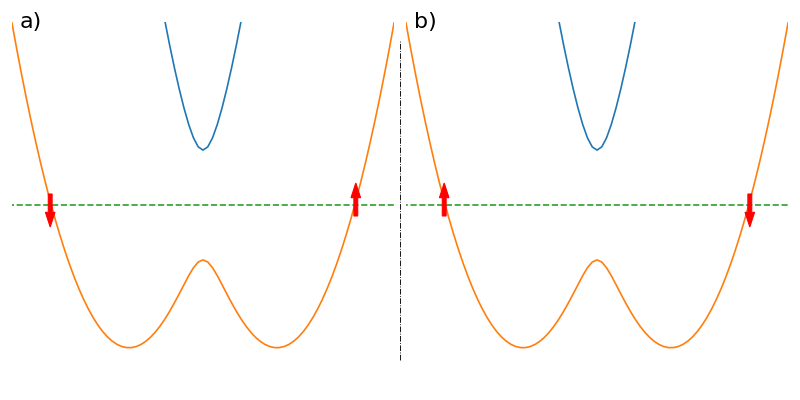

In [4]:
%matplotlib notebook
# plt.rcParams['text.usetex'] = True

eso = 10
f_p = lambda ep_0: ep_0**2 + np.sqrt(1 + eso*ep_0**2)
f_m = lambda ep_0: ep_0**2 - np.sqrt(1 + eso*ep_0**2)



r = np.arange(-10, 10, 0.1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=100, tight_layout=True, facecolor=None)

hh = 0.3
y_lim = [-1, 1]
x_lim = [-4, 4]

axs[0].arrow(x=3.2, y=-0.06, dx=0, dy=0.1, width=.08, head_length =0.08, head_width = 0.2, facecolor='red', zorder=10, edgecolor = "red")
axs[0].arrow(x=-3.2, y=0.06, dx=0, dy=-0.1, width=.08, head_length =0.08, head_width = 0.2, facecolor='red', zorder=10, edgecolor = "red")

axs[0].plot(r, [hh*f_p(i) for i in r])
axs[0].plot(r, [hh*f_m(i) for i in r])
axs[0].plot(r, [0 for i in r], linestyle = "dashed")
axs[0].text(0.05, 1, "a)", fontsize=20, horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
 

axs[0].set_xlim(x_lim[0], x_lim[1])
axs[0].set_ylim(y_lim[0], y_lim[1])

axs[1].arrow(x=3.2, y=0.06, dx=0, dy=-0.1, width=.08, head_length =0.08, head_width = 0.2, facecolor='red', zorder=10, edgecolor = "red")
axs[1].arrow(x=-3.2, y=-0.06, dx=0, dy=0.1, width=.08, head_length =0.08, head_width = 0.2, facecolor='red', zorder=10, edgecolor = "red")

axs[1].plot(r, [hh*f_p(i) for i in r])
axs[1].plot(r, [hh*f_m(i) for i in r])
axs[1].plot(r, [0 for i in r], linestyle = "dashed")
axs[1].text(0.05, 1, "b)", fontsize=20, horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

axs[1].set_xlim(x_lim[0], x_lim[1])
axs[1].set_ylim(y_lim[0], y_lim[1])

axs[0].set_xticks([])
axs[0].set_yticks([])  
axs[0].axis('off')

axs[1].set_xticks([])
axs[1].set_yticks([])  
axs[1].axis('off')

line = plt.Line2D((.5,.5),(.1,.9), color="k", linewidth=0.8, linestyle="dashdot")
fig.add_artist(line)
# plt.savefig("plots/Report/Dirac_dilema_dispersion_rel.svg", transparent = True)
plt.savefig(BASE_PATH+SECTION_1+"Dirac_dilema_dispersion_rel.pdf", transparent = True)

plt.show()

# inhomegeneous hamiltonian

## single interface

### transition coefficient

In [33]:
alp_r = 10
# Eso_profile = [-1, alp_r]
Eso_profile = [alp_r, -alp_r]

x_profile = [0]

junction = RachbaJunction([x_profile, Eso_profile])


def g(ee, par):
    junction[1] = -par
    junction[0] = par
    S = junction.get_scattering_matrix(ee)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {parr}")
        return np.nan
    else:
        return S.t_coef
    
r = np.arange(-1.1, 1.1, 0.011)
eso = [1, 5, 10, 20]
res = make_grid(r, eso, [g])

<IPython.core.display.Javascript object>


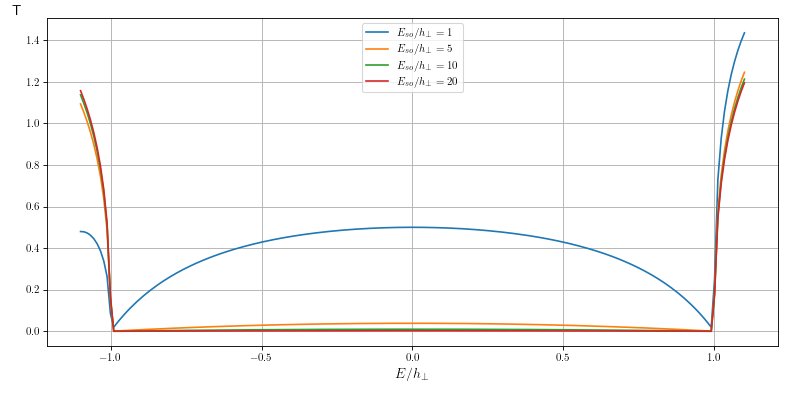

In [34]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

for j, k in enumerate(res.keys()):
    axs.plot(r, res[k][0], label=fr"$E_{{so}}/h_\perp = {k}$")
    axs.set_xlabel(r"$E/h_\perp$", fontsize=13)
    axs.set_ylabel("T", loc = 'top', rotation=0, fontsize=13)
    
axs.grid(True)
axs.legend()

# fig.suptitle("Trasmission coefficient "r"$E =$"f"{ee11}", fontsize=16)
            
# plt.savefig(BASE_PATH+SECTION_2+"Dirac_dilema_1interface_transmission.pdf", transparent = True)
plt.show()

### wave function

In [286]:
ee = 0
# ee = 0

al_r = 10
alpha = [al_r, -al_r]

profile = [0]

junction = RachbaJunction([profile, alpha])
S = junction.get_scattering_matrix(ee)

def b_region_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.E_so = junction[0]
        wf = junction.get_WF(x, E)
        injected = a[0]*wf[:, 0]
        reflected = np.dot(S.C[:2,:], np.array(a))[0]*wf[:, 1]
        evanescent = np.dot(S.C[2:, :], np.array(a))[0]*wf[:, 2]
        
        if np.isclose(x, 0, atol = 1e-3):
            print("left")
            print(f"|r| {np.linalg.norm(np.dot(S.C[:2,:], np.array(a))[0])}")
            print(f"|pho| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0])}")
            
    elif x > junction.interface[0]:
        junction.E_so = junction[1]    
        wf = junction.get_WF(x, E)
        injected = a[1]*wf[:, 1]
        reflected = np.dot(S.C[:2,:], np.array(a))[1]*wf[:, 0]
        evanescent = np.dot(S.C[2:, :], np.array(a))[1]*wf[:, 3]
        if np.isclose(x, 0, atol = 1e-3):
            print("rigth")
            print(f"|t| {np.linalg.norm(np.dot(S.C[:2,:], np.array(a))[1])}")
            print(f"|gamma| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1])}")
    return injected + reflected + evanescent

    
real_1 = []
imag_1 = []

real_2 = []
imag_2 = []

x_range = np.arange(-10, 10, 0.001)
# x_range = np.arange(-2.5, 2.5, 0.001)
for xx in x_range:
    r = b_region_WF(xx, ee)
    real_1.append(r[0].real)
    real_2.append(r[1].real)
    
    imag_1.append(r[0].imag)
    imag_2.append(r[1].imag)

left
|r| 0.9950371902099889
|pho| 0.07031584820860887
rigth
|t| 0.09950371902099552
|gamma| 1.4080737630634743


<IPython.core.display.Javascript object>


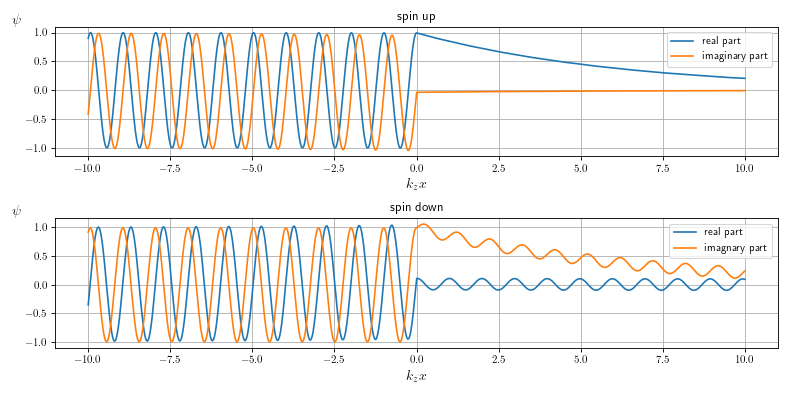

In [81]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

axs[0].plot(x_range, real_1, label="real part")
axs[0].plot(x_range, imag_1, label="imaginary part")
axs[0].set_title("spin up")

axs[1].plot(x_range, real_2, label="real part")
axs[1].plot(x_range, imag_2, label="imagnary part")
axs[1].set_title("spin down")



# fig.suptitle(fr"$$E_{{so}}/h_\perp= ({alpha[0]}, {alpha[1]}), \, E/h_\perp = {ee}$$", fontsize=16)

for i in axs:
    i.set_xlabel(r"$k_z x$", fontsize=13)
    i.set_ylabel(r"$\psi$", loc = 'top', rotation=0, fontsize=13)
    i.legend()
    i.grid(True)
    
plt.savefig(BASE_PATH+SECTION_2+"Dirac_dilema_wavefuncton.pdf", transparent = True)
plt.show()

## 2 interfaces

### Dispersion rrelation

<IPython.core.display.Javascript object>


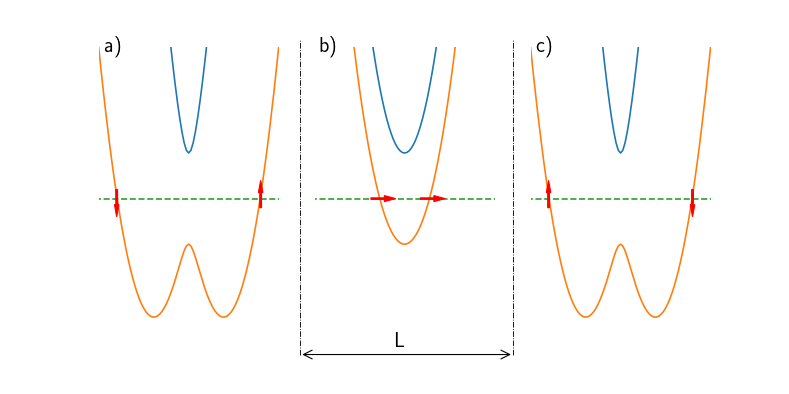

In [10]:
%matplotlib notebook
# plt.rcParams['text.usetex'] = True

eso = 10
f_p = lambda ep_0, ee: ep_0**2 + np.sqrt(1 + ee*ep_0**2)
f_m = lambda ep_0, ee: ep_0**2 - np.sqrt(1 + ee*ep_0**2)



r = np.arange(-10, 10, 0.1)

fig, axs = plt.subplots(1, 3, figsize=(10, 5), dpi=100,  facecolor=None)

hh = 0.3
y_lim = [-1, 1]
x_lim = [-4, 4]

region_lbl = ["a)", "b)", "c)"]
for j, i in enumerate(axs):
    if j == 1:
        eso = 0.4
        r_spin = {"x": 0.7, "y":0, "dx": 0.6, "dy": 0, "width": 0.01, "head_length":0.5, "head_width":0.04}
        l_spin = {"x": -1.5, "y":0, "dx": 0.6, "dy": 0, "width": 0.01, "head_length":0.5, "head_width":0.04}
    else:
        r_spin = {"x": 3.2, "y":-0.06, "dx": 0, "dy": 0.1, "width": 0.08, "head_length":0.08, "head_width":0.2} if j == 0 else {"x": 3.2, "y":0.06, "dx": 0, "dy": -0.1, "width": 0.08, "head_length":0.08, "head_width":0.2}
        l_spin = {"x": -3.2, "y":0.06, "dx": 0, "dy": -0.1, "width": 0.08, "head_length":0.08, "head_width":0.2} if j == 0 else {"x": -3.2, "y":-0.06, "dx": 0, "dy": 0.1, "width": 0.08, "head_length":0.08, "head_width":0.2}
        eso = 10

    i.arrow(**r_spin, facecolor='red', zorder=10, edgecolor = "red")
    i.arrow(**l_spin, facecolor='red', zorder=10, edgecolor = "red")

    i.plot(r, [hh*f_p(i, eso) for i in r])
    i.plot(r, [hh*f_m(i, eso) for i in r])
    i.plot(r, [0 for i in r], linestyle = "dashed")
    i.text(0.08, 1, region_lbl[j], fontsize=20, horizontalalignment='center', verticalalignment='center', transform=i.transAxes)
 

    i.set_xlim(x_lim[0], x_lim[1])
    i.set_ylim(y_lim[0], y_lim[1])

    i.set_xticks([])
    i.set_yticks([])  
    i.axis('off')

interface = [.38, .65]
p1 = patches.FancyArrowPatch((interface[0], 0.1), (interface[1], 0.1), arrowstyle='<->', mutation_scale=20)
fig.add_artist(p1)

textt = fig.text(0.5, 0.12, "L", fontsize=20)


line = plt.Line2D((interface[0], interface[0]),(.1,.9), color="k", linewidth=0.8, linestyle="dashdot")
fig.add_artist(line)
line = plt.Line2D((interface[1], interface[1]),(.1,.9), color="k", linewidth=0.8, linestyle="dashdot")
fig.add_artist(line)

plt.savefig(BASE_PATH+SECTION_2+"Dirac_dilema_2interface_dispersion_rel.pdf", transparent = True)
plt.show()

### $T vs \phi$ with $E_{so}/h_\perp = (10, 0, -10)$

In [27]:
alp_r = 15
Eso_profile = [alp_r,0, -alp_r]

x_profile = [-1,0, 1]

junction = RachbaJunction([x_profile, Eso_profile])


def g(ee, par):
    junction.interface = [0, par]
    S = junction.get_scattering_matrix(ee)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {parr}")
        return np.nan
    else:
        return S.t_coef
    
r = np.arange(-1.1, 1.1, 0.011)

# phi_lbl = [r"0.1", r"\frac{\pi}{4}", r"\pi", r"\frac{3}{2}\pi", r"10", r"p\phi_{max}"]
# eso = [0.1, np.pi/4, np.pi, 3*np.pi/2, 10, 2/(np.sqrt(alp_r))]

phi_lbl = [r"0.1", r"\frac{\pi}{4}", r"\phi_{max}"]
eso = [0.1, np.pi/4, 2/(np.sqrt(alp_r))]

phi_dct = {i: j for i, j in zip(eso, phi_lbl)}
print(phi_dct)

res = make_grid(r, eso, [g])

{0.1: '0.1', 0.7853981633974483: '\\frac{\\pi}{4}', 0.5163977794943222: '\\phi_{max}'}


<IPython.core.display.Javascript object>


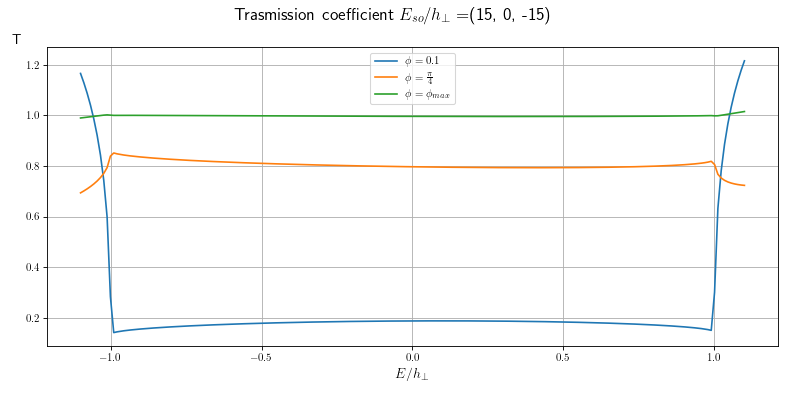

In [28]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

for j, k in enumerate(res.keys()):
    axs.plot(r, res[k][0], label=fr"$\phi = {phi_dct[k]}$")
    axs.set_xlabel(r"$E/h_\perp$", fontsize=13)
    axs.set_ylabel("T", loc = 'top', rotation=0, fontsize=13)
    
axs.grid(True)
axs.legend()

fig.suptitle("Trasmission coefficient "r"$E_{so}/h_\perp =$"f"({junction[0]}, {junction[1]}, {junction[2]})", fontsize=16)
            
# plt.savefig(BASE_PATH+SECTION_2+"Dirac_dilema_2interface_transmission.pdf", transparent = True)
# plt.savefig("plots/2interface_transmission.pdf", transparent = False)
plt.show()

### Density plot

In [120]:
alp_r = 10

Eso_profile = [alp_r,0, -alp_r]

x_profile = [-1, 1]

junction = RachbaJunction([x_profile, Eso_profile])


def g(ee, par):
    junction.interface = [0, par]    
    S = junction.get_scattering_matrix(ee)
    
#     junction.interface = [0, np.pi*np.sqrt(ee/E_l)]
#     S = junction.get_scattering_matrix(par/ee)
    
#     junction[0] = ee
#     junction[2] = -ee
#     S = junction.get_scattering_matrix(0)

    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef
    
# x = np.arange(0.55, 15, 0.11)
x = np.arange(-.999, .999, 0.011)

y = np.arange(0.001, 8*np.pi, 0.1)

res = make_grid(x, y, [g])

total_res = []

for i in res.keys():
    total_res.append(res[i][0])


total_res = np.array(total_res, dtype = np.float64)
print(total_res.shape)
print(x.shape)
print(y.shape)

Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 16.501
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 16.501
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 16.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 16.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 16.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.8779999999999999, E_so: 16.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 16.701
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 16.701
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 16.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 16.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 16.8010000000000

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 17.701
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 17.701
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 17.701
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 17.701
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 17.701
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 17.701
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 17.701
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 17.701
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 17.701
Scattering matrix isn't unitary
not unitary matrix length: -0.8889999999999999, E_so: 17.701
Scattering matrix isn't unitary
not unitary matrix length: -0.8779999999999999, E_so: 17.701
Scattering matrix isn't unitary
not unitar

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix length: -0.8779999999999999, E_so: 18.201
Scattering matrix isn't unitary
not unitary matrix leng

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix length: -0.8889999999999999, E_so: 18.501
Scattering matrix isn't unitary
not unitary matrix leng

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 18.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 18.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 18.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 18.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 18.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 18.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 18.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 18.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 18.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 18.801000000000002
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 19.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 19.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 19.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 19.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 19.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 19.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 19.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 19.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 19.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 19.101000000000003
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 19.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 19.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 19.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 19.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 19.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 19.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 19.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 19.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 19.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 19.401000000000003
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 19.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 19.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 19.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 19.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 19.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 19.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 19.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 19.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 19.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 19.601000000000003
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 19.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 19.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 19.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 19.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 19.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 19.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 19.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 19.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 19.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 19.801000000000002
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix length: -0.8889999999999999, E_so: 20.001
Scattering matrix isn't unitary
not unitary matrix leng

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 20.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 20.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 20.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 20.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 20.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 20.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 20.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 20.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 20.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 20.201000000000004
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 20.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 20.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 20.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 20.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 20.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 20.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 20.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 20.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 20.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 20.401000000000003
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 20.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 20.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 20.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 20.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 20.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 20.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 20.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 20.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 20.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 20.601000000000003
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 20.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 20.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 20.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 20.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 20.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 20.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 20.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 20.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 20.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 20.801000000000002
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix length: -0.8889999999999999, E_so: 21.001
Scattering matrix isn't unitary
not unitary matrix leng

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 21.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 21.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 21.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 21.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 21.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 21.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 21.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 21.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 21.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 21.201000000000004
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 21.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 21.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 21.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 21.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 21.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 21.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 21.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 21.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 21.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 21.401000000000003
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 21.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 21.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 21.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 21.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 21.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 21.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 21.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 21.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 21.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 21.601000000000003
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 21.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 21.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 21.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 21.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 21.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 21.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 21.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 21.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 21.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 21.801000000000002
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.17399999999999927, E_so: 21.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 22.001
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 22.001
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 22.001
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 22.001
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 22.001
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 22.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 22.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 22.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 22.001
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 22.001
Scattering matrix isn't unitary
not unitar

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 22.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 22.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 22.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 22.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 22.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 22.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 22.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 22.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 22.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 22.201000000000004
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 22.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 22.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 22.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 22.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 22.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 22.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 22.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 22.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 22.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 22.401000000000003
Scattering matrix isn't uni

Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 22.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 22.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 22.501
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 22.501
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 22.501
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 22.501
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 22.501
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 22.501
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 22.501
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 22.501
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 22.501
Scattering matrix isn't unita

Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 22.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 22.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 22.701000000000004
Scattering matrix isn't un

Scattering matrix isn't unitary
not unitary matrix length: -0.14099999999999924, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.12999999999999923, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 22.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 22.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 22.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 22.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 22.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 22.801000000000002
Scattering

Scattering matrix isn't unitary
not unitary matrix length: -0.17399999999999927, E_so: 22.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.16299999999999926, E_so: 22.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.15199999999999925, E_so: 22.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.12999999999999923, E_so: 22.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 22.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 22.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 22.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 22.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 22.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 22.901000000000

Scattering matrix isn't unitary
not unitary matrix length: -0.12999999999999923, E_so: 22.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 22.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 22.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 23.001
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 23.001
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 23.001
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 23.001
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 23.001
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 23.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 23.001
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 23.001
Scattering matri

Scattering matrix isn't unitary
not unitary matrix length: -0.12999999999999923, E_so: 23.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 23.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 23.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 23.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 23.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: 0.002000000000000779, E_so: 23.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 23.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 23.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 23.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 23.2010000000000

Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 23.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 23.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 23.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.03099999999999914, E_so: 23.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 23.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 23.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 23.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 23.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 23.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 23.301000000000002
Scattering matrix isn't 

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 23.401000000000003
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.03099999999999914, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: 0.002000000000000779, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: 0.0130000000000009, E_so: 23.401000000000003
Scattering matrix isn't unitary
not unitary matr

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 23.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 23.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 23.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 23.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 23.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 23.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 23.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 23.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 23.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 23.601000000000003
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 23.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 23.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 23.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 23.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 23.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 23.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 23.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 23.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 23.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 23.701000000000004
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.988, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.977, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.966, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.955, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.944, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9329999999999999, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9219999999999999, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.9109999999999999, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.8999999999999999, E_so: 23.801000000000002
Scattering matrix isn't unit

Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.03099999999999914, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.01999999999999913, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: 0.002000000000000779, E_so: 23.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.999, E_so: 23.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -

Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 23.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 23.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 23.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 23.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 23.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.03099999999999914, E_so: 23.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.01999999999999913, E_so: 23.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.00899999999999912, E_so: 23.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: 0.0130000000000009, E_so: 23.901000000000003
Scattering matrix isn't unitary
not unitary matri

Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 24.001
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 24.001
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 24.001
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 24.001
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 24.001
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 24.001
Scattering matrix isn't unitary
not unitary matrix length: -0.03099999999999914, E_so: 24.001
Scattering matrix isn't unitary
not unitary matrix length: -0.01999999999999913, E_so: 24.001
Scattering matrix isn't unitary
not unitary matrix length: -0.00899999999999912, E_so: 24.001
Scattering matrix isn't unitary
not unitary matrix length: 0.002000000000000779, E_so: 24.001
Scattering matrix isn't unitary
not unitary matrix length: 0.

not unitary matrix length: -0.2069999999999993, E_so: 24.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.19599999999999929, E_so: 24.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.18499999999999928, E_so: 24.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.17399999999999927, E_so: 24.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.16299999999999926, E_so: 24.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.15199999999999925, E_so: 24.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.14099999999999924, E_so: 24.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.12999999999999923, E_so: 24.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 24.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921

Scattering matrix isn't unitary
not unitary matrix length: -0.14099999999999924, E_so: 24.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.12999999999999923, E_so: 24.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 24.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 24.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 24.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 24.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 24.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 24.201000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 24.201000000000004
Scattering matrix isn't unitary
not unitary mat

Scattering matrix isn't unitary
not unitary matrix length: -0.12999999999999923, E_so: 24.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 24.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 24.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 24.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 24.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 24.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 24.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 24.301000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 24.301000000000002
Scattering matrix isn't unitary
not unitary mat

Scattering matrix isn't unitary
not unitary matrix length: -0.15199999999999925, E_so: 24.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.14099999999999924, E_so: 24.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.12999999999999923, E_so: 24.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 24.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 24.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 24.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 24.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 24.401000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 24.401000000000003
Scattering matrix isn't unitary
not unitary mat

Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 24.501
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 24.501
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 24.501
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 24.501
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 24.501
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 24.501
Scattering matrix isn't unitary
not unitary matrix length: -0.03099999999999914, E_so: 24.501
Scattering matrix isn't unitary
not unitary matrix length: -0.01999999999999913, E_so: 24.501
Scattering matrix isn't unitary
not unitary matrix length: -0.00899999999999912, E_so: 24.501
Scattering matrix isn't unitary
not unitary matrix length: 0.002000000000000779, E_so: 24.501
Scattering matrix isn't unitary
not unitary matrix length: 0.

Scattering matrix isn't unitary
not unitary matrix length: -0.12999999999999923, E_so: 24.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 24.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 24.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 24.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 24.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 24.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 24.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 24.601000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 24.601000000000003
Scattering matrix isn't unitary
not unitary mat

Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 24.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 24.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 24.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 24.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 24.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 24.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 24.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 24.701000000000004
Scattering matrix isn't unitary
not unitary matrix length: -0.03099999999999914, E_so: 24.701000000000004
Scattering matrix isn't unitary
not unitary mat

Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 24.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 24.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 24.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 24.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 24.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 24.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: -0.03099999999999914, E_so: 24.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: 0.002000000000000779, E_so: 24.801000000000002
Scattering matrix isn't unitary
not unitary matrix length: 0.02400000000000102, E_so: 24.801000000000002
Scattering matrix isn't unitary
not unitary matr

Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 24.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 24.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 24.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 24.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 24.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 24.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.03099999999999914, E_so: 24.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.01999999999999913, E_so: 24.901000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.00899999999999912, E_so: 24.901000000000003
Scattering matrix isn't unitary
not unitary mat

Scattering matrix isn't unitary
not unitary matrix length: -0.15199999999999925, E_so: 25.001
Scattering matrix isn't unitary
not unitary matrix length: -0.14099999999999924, E_so: 25.001
Scattering matrix isn't unitary
not unitary matrix length: -0.12999999999999923, E_so: 25.001
Scattering matrix isn't unitary
not unitary matrix length: -0.11899999999999922, E_so: 25.001
Scattering matrix isn't unitary
not unitary matrix length: -0.10799999999999921, E_so: 25.001
Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 25.001
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 25.001
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 25.001
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 25.001
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 25.001
Scattering matrix isn't unitary
not unitary matrix length: -0

Scattering matrix isn't unitary
not unitary matrix length: -0.0969999999999992, E_so: 25.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.08599999999999919, E_so: 25.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.07499999999999918, E_so: 25.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.06399999999999917, E_so: 25.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.05299999999999916, E_so: 25.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.04199999999999915, E_so: 25.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.03099999999999914, E_so: 25.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.01999999999999913, E_so: 25.101000000000003
Scattering matrix isn't unitary
not unitary matrix length: -0.00899999999999912, E_so: 25.101000000000003
Scattering matrix isn't unitary
not unitary mat

<IPython.core.display.Javascript object>


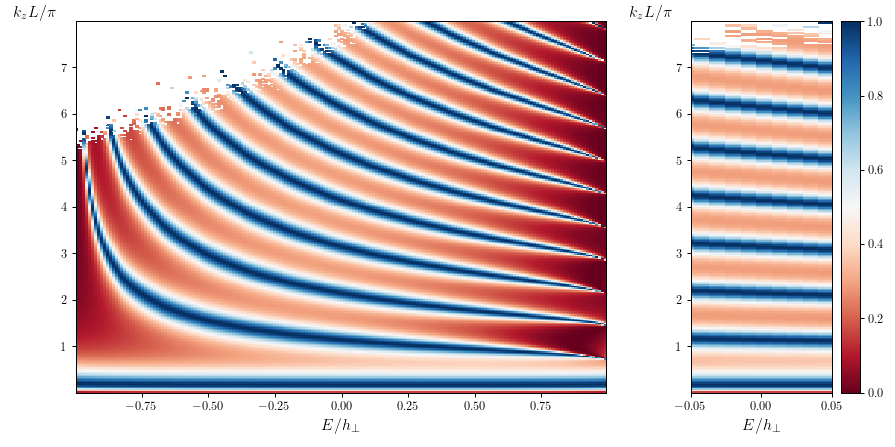

In [121]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, 2, 
                        figsize=(10, 5),
                        dpi=100,
                        tight_layout=True,
                        facecolor='white',
                        gridspec_kw={
                            'width_ratios': [3, 1]})

z_min, z_max = total_res.min(), total_res.max()

c = axs[0].pcolormesh(x, y/np.pi, total_res, cmap='RdBu', vmin=0, vmax=1, shading='auto')

axs[0].axis([x.min(), x.max(), y.min()/np.pi, y.max()/np.pi])

c1 = axs[1].pcolormesh(x, y/np.pi, total_res, cmap='RdBu', vmin=0, vmax=1, shading='auto')

axs[1].axis([-.05, .05, y.min()/np.pi, y.max()/np.pi])

# axs.plot(x, np.full(len(x), 0.0631588608375565))


for iax in axs:
    iax.set_xlabel(r"$E/h_\perp$", fontsize=13)
    iax.set_ylabel(r"$k_z L/ \pi$", loc = 'top', rotation=0, fontsize=13)

fig.colorbar(c1, ax=axs[1])


# plt.savefig("plots/Report/2interface_transmission_density2.pdf", transparent = True)
# plt.savefig(BASE_PATH+SECTION_2+"2interface_transmission_density.pdf", transparent = True)
plt.show()

<IPython.core.display.Javascript object>


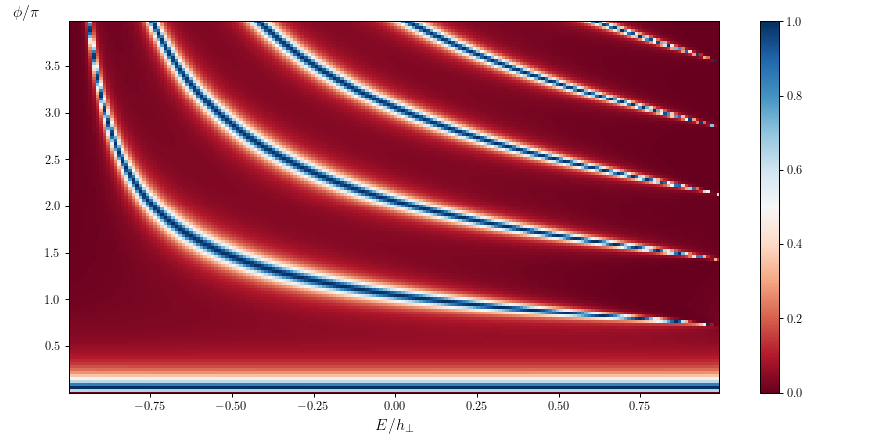

In [67]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, 
                        figsize=(10, 5),
                        dpi=100,
                        tight_layout=True,
                        facecolor='white')

z_min, z_max = total_res.min(), total_res.max()

c = axs.pcolormesh(x, y/np.pi, total_res, cmap='RdBu', vmin=0, vmax=1, shading='auto')

axs.axis([x.min(), x.max(), y.min()/np.pi, y.max()/np.pi])

# axs.plot(x, np.full(len(x), 0.0631588608375565))

axs.set_xlabel(r"$E/h_\perp$", fontsize=13)

axs.set_ylabel(r"$\phi/ \pi$", loc = 'top', rotation=0, fontsize=13)

fig.colorbar(c, ax=axs)

# plt.savefig(BASE_PATH+SECTION_2+"2interface_transmission_density.pdf", transparent = True)
plt.show()

In [18]:
# L = 100e-9#m

# E_l  = np.pi**2*cc.hbar**2/(2*m*L**2)/ev_to_j

alp_r = 10
# Eso_profile = [-1, alp_r]
Eso_profile = [alp_r, 0, -alp_r]

x_profile = [0, 1]

junction = RachbaJunction([x_profile, Eso_profile])


def g(ee, par):
#     junction.interface = [0, np.pi*np.sqrt(ee/E_l)]
    junction.interface = [0, ee]
    S = junction.get_scattering_matrix(par)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef
    
r = np.arange(0, 5, 0.011)
eso = np.array([0, .99])
res = make_grid(r, eso, [g])

<IPython.core.display.Javascript object>


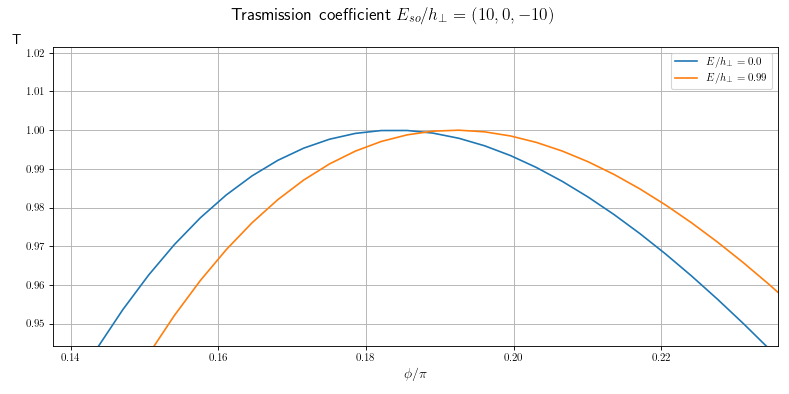

In [19]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

for j, k in enumerate(res.keys()):
    axs.plot(r/np.pi, res[k][0], label=fr"$E/h_\perp = {k}$")
    axs.set_xlabel(r"$\phi/\pi$", fontsize=13)
    axs.set_ylabel("T", loc = 'top', rotation=0, fontsize=13)
    
axs.grid(True)
axs.legend()

fig.suptitle("Trasmission coefficient "r"$E_{so}/h_\perp = (10, 0 , -10)$", fontsize=16)
            
# plt.savefig(BASE_PATH+SECTION_2+"Dirac_dilema_1interface_transmission.pdf", transparent = True)
# plt.savefig("Transmission_density_slice.pdf", transparent = True)
plt.show()

In [21]:
print(2/(np.pi * np.sqrt(alp_r)))
print(2/(np.sqrt(alp_r)))

0.20131684841794814
0.6324555320336759


### The InSb case

In [6]:
DIRAC_PAPER_PLOTS = "plots/paper_plots/"

In [ ]:
ev_to_j = 1.602176634e-19
#InSb
m = 0.015*cc.m_e

h_xy = 0.05e-3# eV

k_z = np.sqrt(2*m*h_xy*ev_to_j)/cc.hbar# 1/Metr
l_z = 1/k_z
print(f"k_z {k_z}") #1/Metr
print(f"l_z {l_z}m")
print(f"l_z {l_z*10**9:.2f}nm") #Metr


In [ ]:
L = 100e-9#m

E_l  = np.pi**2*cc.hbar**2/(2*m*L**2)/ev_to_j


print(E_l, E_l*1e3)

print(k_z * L)
print(np.pi*np.sqrt(h_xy/E_l), np.sqrt(h_xy/E_l))

#### $T vs h_\perp$

In [19]:
alp_r = 10
Eso_profile = [alp_r, 0, -alp_r]
x_profile = [-.31, .31]
# Eso_profile = [alp_r, -alp_r]
# x_profile = [0]
junction = RachbaJunction([x_profile, Eso_profile])


def g(ee, par):
    junction[0] = par/ee
    junction[2] = -par/ee
#     junction[1] = -par/ee  
    junction.interface = [0, np.pi*np.sqrt(ee/E_l)]

    S = junction.get_scattering_matrix(0)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef
    
h_p = np.arange(0.001, 0.1, 0.0001)*1e-3

e = np.array([.5, .3, .1])*1e-3
phi_dct = {i: j for i, j in zip(eso, phi_lbl)}

res = make_grid(h_p, e, [g])

<IPython.core.display.Javascript object>


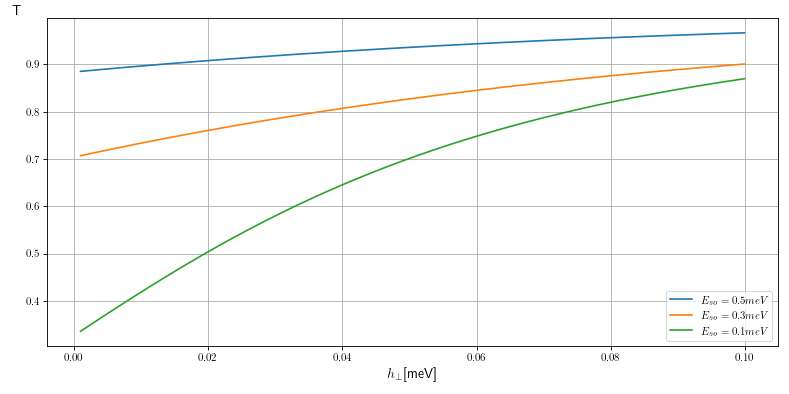

In [20]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

for j, k in enumerate(res.keys()):
    axs.plot(h_p*1e3, res[k][0], label=fr"$E_{{so}} = {k*1e3}meV$")
    axs.set_xlabel(r"$h_\perp$[meV]", fontsize=13)
    axs.set_ylabel("T", loc = 'top', rotation=0, fontsize=13)
    
axs.grid(True)
axs.legend()
             
plt.savefig(BASE_PATH+SECTION_2+"T_vs_h.pdf", transparent = True)
plt.show()

#### $T vs E_{so}$

In [9]:
alp_r = 10
Eso_profile = [alp_r, 0, -alp_r]
# Eso_profile = [-alp_r, 0, alp_r]
x_profile = [-.31, .31]
junction = RachbaJunction([x_profile, Eso_profile])


def g(ee, par):
#     print(par*1e3, ee/par, ee*1e3)
    junction[0] = ee/par
    junction[2] = -ee/par 
    junction.interface = [0, np.pi*np.sqrt(par/E_l)]
    
    S = junction.get_scattering_matrix(0)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}, {ee/par}")
        return np.nan
    else:
        return S.t_coef
    
# eso = np.arange(0.001, .5, 0.0011)*1e-3
h_p = np.array([0.1, .05, .01, .005])*1e-3

# h_p = np.array([.001, 0.01])*1e-3
# eso = np.arange(0.001, 2, 0.0011)*1e-3

# h_p = np.array([2])*1e-3
# eso = np.arange(0.001, 2, 0.0011)*1e-3

eso = np.arange(0.001, 10, 0.0011)*1e-3

res = make_grid(eso, h_p, [g])

In [ ]:
(4 Eso (-2 Sqrt[Eso] Cos[phi] + 
     2 Sqrt[Eso]
       Cosh[phi] + (-1 + Eso) Sin[phi] + (1 + Eso) Sinh[
       phi])^2)/(4 Eso Cosh[
     phi]^2 (9 Eso Cos[phi]^2 + 2 (1 + Eso^2) Sin[phi]^2 - 
      3 (-1 + Eso) Sqrt[Eso] Sin[2 phi]) + 
   4 Eso (1 + Eso) (-2 Sqrt[Eso] Cos[phi] + (-1 + Eso) Sin[phi]) Sinh[
     phi] + (8 (Eso + Eso^3) Cos[phi]^2 + (1 + 14 Eso^2 + Eso^4) Sin[
        phi]^2 - 2 (-1 + Eso)^3 Sqrt[Eso] Sin[2 phi]) Sinh[phi]^2 + 
   4 Sqrt[Eso]
     Cosh[phi] (-6 Eso^(3/2) Cos[phi] + 
      2 (-1 + Eso) Eso Sin[
        phi] + (6 Eso (1 + Eso) Cos[phi]^2 + (1 + Eso^3) Sin[
           phi]^2) Sinh[phi]) + 
   Eso (4 Eso - 
      6 (1 + Eso) Sin[
        phi] ((-1 + Eso) Cos[phi] - Sqrt[Eso] Sin[phi]) Sinh[2 phi]))

In [10]:
def expansion(x):
    # r = eso/h
    return x**2/(1 + (x/2)**2)**2
#     return 1/(1+4*(r)**2) + np.sqrt(1/r)*x + (r)*x**2

def expansion2(x):
    # r = eso/h
    return 16*np.pi**2*x/E_l/(4 + np.pi**2*x/E_l)**2
#     return 1/(1+4*(r)**2) + np.sqrt(1/r)*x + (r)*x**2

<IPython.core.display.Javascript object>


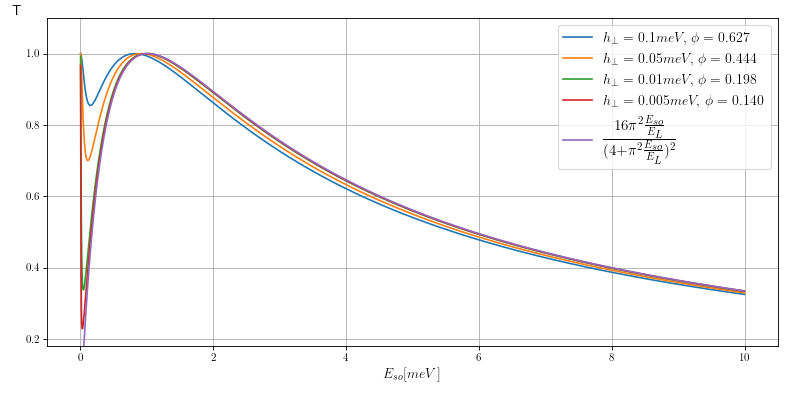

In [64]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

# exp_label = r"$\frac{16 \frac{E_{so}}{h_\perp} \phi^2}{(4 + \frac{E_{so}}{h_\perp} \phi^2)^2}$"
# exp_label = r"$\frac{16 (k_{so} L)^2}{(4 + (k_{so} L)^2)^2}$"
exp_label = r"$\frac{16 \pi^2 \frac{E_{so}}{E_L} }{(4 + \pi^2 \frac{E_{so}}{E_L})^2}$"



for j, k in enumerate(res.keys()):
#     "numerical result\n"fr"$h_\perp = {k*1e3}meV, \, \phi = {np.pi*np.sqrt(k/E_l):.3f}$"
    axs.plot(eso*1e3, res[k][0], label=fr"$h_\perp = {k*1e3}meV, \, \phi = {np.pi*np.sqrt(k/E_l):.3f}$")
#     axs.plot(eso*1e3, res[k][0], label=fr"$h_\perp = {k*1e3}meV, \, \phi = {np.pi*np.sqrt(k/E_l):.3f}$")
#     axs.plot(eso*1e3, [expansion(np.pi*np.sqrt(k/E_l), e/k) for e in eso], label=exp_label)#, label=f"{k*1e3} exp")

    axs.set_xlabel(r"$E_{so}[meV]$", fontsize=13)
    axs.set_ylabel("T", loc = 'top', rotation=0, fontsize=13)
    
#     idx = np.argmin(np.abs(eso*1e3 - .5*k*1e3))
#     axs.plot(.5*k*1e3, res[k][0, idx], 'bo')

axs.plot(eso*1e3, [expansion2(e) for e in eso], label=exp_label)

# axs.legend()
axs.set_ylim([.18, 1.1])
leg = axs.legend(prop={'family': 'Georgia', 'size': 13})
# t1, t2, t3 = leg.get_texts()
t1 = leg.get_texts()
# here we create the distinct instance
t1[-1]._fontproperties = t1[0]._fontproperties.copy()
t1[-1].set_size(20)

axs.grid(True)


#fr"$h_\perp = {k*1e3}meV, \, \phi = {np.pi*np.sqrt(k/E_l):.3f}$"
# fig.suptitle(fr"$h_\perp = {k*1e3}meV, \, \phi = {np.pi*np.sqrt(k/E_l):.3f}$", fontsize=16)


# fig.suptitle("Trasmission coefficient "r"$E_{so}/h_\perp = (10, 0 , -10)$", fontsize=16)
# fig.suptitle("Trasmission coefficient "r"$E =$"f"{ee11}", fontsize=16)
         
# plt.savefig(BASE_PATH+SECTION_2+"T_vs_E_so.pdf", transparent = True)
# plt.savefig(BASE_PATH+SECTION_2+"T_vs_E_so(expansion).pdf")
plt.show()

<IPython.core.display.Javascript object>


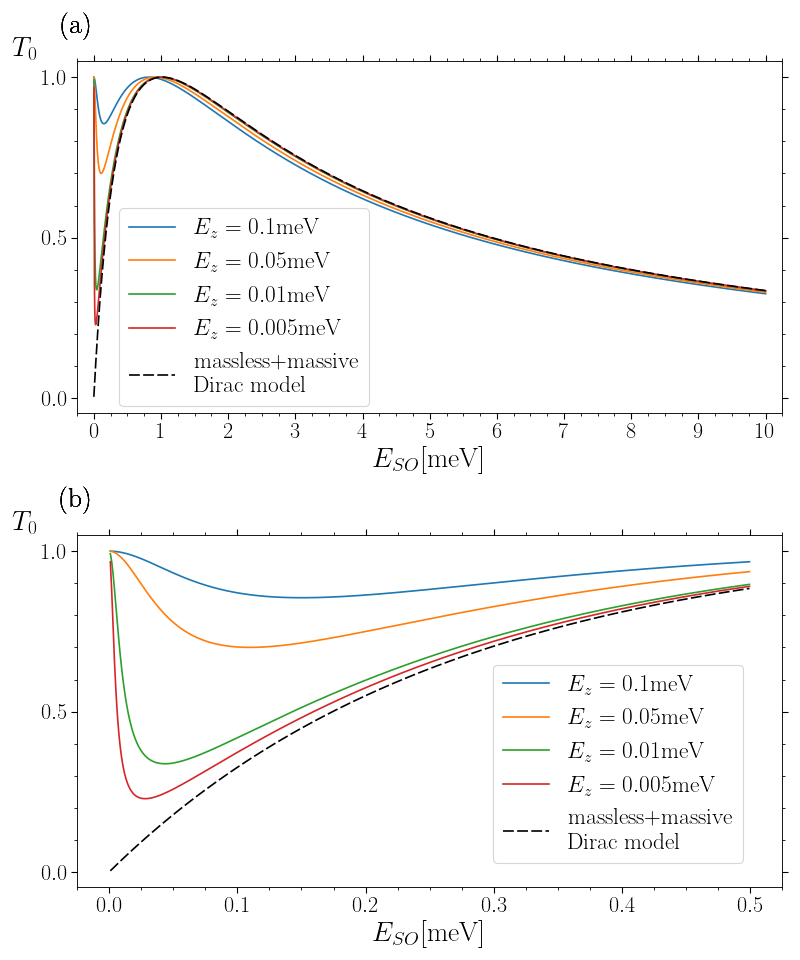

In [22]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True
# Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.family'] = 'Times New Roman'
color_cycle = plt.rcParams['axes.prop_cycle']()


fig, axs = plt.subplots(2, 1, figsize=(10, 12), dpi=100, tight_layout=True, facecolor='white')
# fig, axs = plt.subplots(2, 1, figsize=(8, 12), dpi=500, tight_layout=True, facecolor='white')


exp_label = r"$\frac{(k_{SO} L)^2}{(1 + \frac{(k_{SO} L)^2}{4})^2}$"
exp_label = "massless+massive\nDirac model"

region_lbl = ["(a)", "(b)"]
font = {'family': "Times New Roman", "size": 25}
font2 = {'family': "Times New Roman", "size": 25}
ind, = np.where(np.isclose(0.5, eso*1e3, rtol = 1e-3))[0]



for j, k in enumerate(res.keys()):
#     fr"$h_\perp = {k*1e3}meV, \, k_z L = {np.pi*np.sqrt(k/E_l):.3f}$"
    axs[1].plot((eso*1e3)[:ind], res[k][0][:ind], label=fr"$E_z = {k*1e3}$""meV")
    axs[1].set_xlabel(r"$E_{SO}$""[meV]", fontdict=font)
    axs[1].set_ylabel(r"$T_0$", loc = 'top', rotation=0, fontdict=font)
    
    
    axs[1].text(0, 1.1, region_lbl[1],
                horizontalalignment='center', 
                verticalalignment='center', 
                transform=axs[1].transAxes, 
                fontdict=font2)

    axs[0].plot(eso*1e3, res[k][0], label=fr"$E_z = {k*1e3}$""meV", **next(color_cycle))
    axs[0].set_xlabel(r"$E_{SO}$""[meV]", fontdict=font)
    axs[0].set_ylabel(r"$T_0$", loc = 'top', rotation=0, fontdict=font)

    
    axs[0].text(0, 1.1, region_lbl[0],
                horizontalalignment='center', 
                verticalalignment='center', 
                transform=axs[0].transAxes, 
                fontdict=font2)


# axs[0].plot(eso*1e3, [expansion2(e) for e in eso], label=exp_label, linestyle='dashed', **next(color_cycle))
# axs[0].plot(eso*1e3, [expansion2(e) for e in eso], 
#             label=exp_label, 
#             dashes=[6.5, 2],
# #             linestyle='dashed', 
#             color = 'black')
# axs[1].plot((eso*1e3)[:ind], [expansion2(e) for e in eso[:ind]], 
#             label=exp_label, 
# #             linestyle='dashed',
#             dashes=[6.5, 2],
#             color = 'black')


axs[0].plot(eso*1e3, [expansion2(e) for e in eso], 
            label=exp_label, 
            dashes=[6.5, 2],
#             linestyle='dashed', 
            color = 'black')
axs[1].plot((eso*1e3)[:ind], [expansion2(e) for e in eso[:ind]], 
            label=exp_label, 
#             linestyle='dashed',
            dashes=[6.5, 2],
            color = 'black')


legend_font_size = 21
from matplotlib import ticker
magior = [1.0, 0.1]
minor = [0.25, 0.025]
anchor = [(0.43, 0.3), (0.96, 0.35)]
# for iax in axs:
for i in range(len(axs)):
#     iax.yticks(fontsize=20)
    axs[i].tick_params(axis='x', labelsize=20)
    axs[i].tick_params(axis='y', labelsize=20)
    
    axs[i].xaxis.set_major_locator(ticker.MultipleLocator(magior[i]))
    axs[i].xaxis.set_minor_locator(ticker.MultipleLocator(minor[i]))

    axs[i].xaxis.set_ticks_position('both')
    
    axs[i].yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    axs[i].yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    
#     ValueError: 'bottom' is not a valid value for position; supported values are 'left', 'right', 'both', 'default', 'none'
    axs[i].yaxis.set_ticks_position('both')
    
    axs[i].tick_params(which='major', width=1.00, length=5)
    axs[i].tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    
    lines_labels = axs[0].get_legend_handles_labels()
    # print(lines_labels[0][-1])

    leg = axs[i].legend(*lines_labels, 
                        loc=7, 
                        bbox_to_anchor=anchor[i], 
                        prop={'family': 'Times New Roman', 'size': legend_font_size})
    # t1, t2, t3 = leg.get_texts()
    t1 = leg.get_texts()
    # here we create the distinct instance
    t1[-1]._fontproperties = t1[0]._fontproperties.copy()
    t1[-1].set_size(legend_font_size)

    
axs[0].set_xlim(-0.25, 10.25)
axs[1].set_xlim(-0.025, 0.525)



# plt.savefig(BASE_PATH+SECTION_2+"T_vs_E_so(expansion).pdf")
plt.savefig(DIRAC_PAPER_PLOTS+"T_vs_E_so(expansion).pdf")
plt.show()

<IPython.core.display.Javascript object>


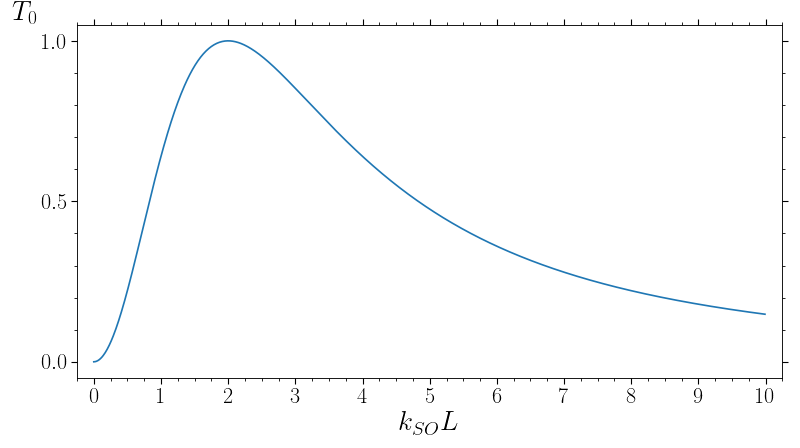

In [213]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'

fig, axs = plt.subplots(1, 1, figsize=(10, 5.6), dpi=100, tight_layout=True, facecolor='white')
# fig, axs = plt.subplots(2, 1, figsize=(8, 12), dpi=500, tight_layout=True, facecolor='white')

exp_label = r"$\frac{(k_{SO} L)^2}{(1 + \frac{(k_{SO} L)^2}{4})^2}$"

font = {'family': "Times New Roman", "size": 25}
font2 = {'family': "Times New Roman", "size": 25}

axs.plot(np.arange(0, 10, 0.01), [expansion(e) for e in np.arange(0, 10, 0.01)])#, linestyle='dashedl')


from matplotlib import ticker
magior = [1.0, 0.1]
minor = [0.25, 0.025]

#     iax.yticks(fontsize=20)
axs.tick_params(axis='x', labelsize=20)
axs.tick_params(axis='y', labelsize=20)
    
axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
axs.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

axs.xaxis.set_ticks_position('both')
    
axs.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
axs.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    
#     ValueError: 'bottom' is not a valid value for position; supported values are 'left', 'right', 'both', 'default', 'none'
axs.yaxis.set_ticks_position('both')
    
axs.tick_params(which='major', width=1.00, length=5)
axs.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)


axs.set_xlabel(r"$k_{SO} L$", fontdict=font)
axs.set_ylabel(r"$T_0$", loc = 'top', rotation=0, fontdict=font)
    
axs.set_xlim(-0.25, 10.25)

plt.savefig(DIRAC_PAPER_PLOTS+"transmission_coefficient.pdf")
plt.show()

#### wave vunction

In [214]:
ee = 0
al_r = 10

alpha = [al_r, 0, -al_r]

# phi = [1.7/(np.sqrt(al_r)), 0.06]
phi = [1/(np.sqrt(al_r)), 0.06]
print(phi)
print(np.sqrt(al_r)/2 * phi[0], np.sqrt(al_r)/2 * phi[1])

x_1 = -2 
x_2 = 2
profile = [0, 1]

junction = RachbaJunction([profile, alpha])
S = junction.get_scattering_matrix(ee)
M = junction.transfer_matrix_at(0, ee)


def t_region_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.E_so = junction[0]
        wf = junction.get_WF(x, E)
        injected = a[0]*wf[:, 0]
        reflected = np.dot(S.C, np.array(a))[0]*wf[:, 1]
        evanescent = np.dot(S.C, np.array(a))[2]*wf[:, 2]
        res = injected + reflected + evanescent
        
        if np.isclose(x, junction.interface[0], atol = 1e-2):
            print("left")
            print(f"|r| {np.linalg.norm(np.dot(S.C[:2,:], np.array(a))[0])}")
            print(f"|pho| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0])}")
            print("\n")
    elif junction.interface[0] < x < junction.interface[1]:
        junction.E_so = junction[1]
        wf = junction.get_WF(x, E)
        
        coeff = np.dot(S.C, np.array(a))
        
        left_coeff = np.array([1, coeff[0], coeff[2], 0])
        
        res = np.dot(wf, np.dot(M, left_coeff))
        if np.isclose(x, junction.interface[1], atol = 1e-2):
            print("center")
            print(f"{x}:{junction.interface[1]} absolure value {np.abs(np.dot(M, left_coeff))}")
            print(f"{x}:{junction.interface[1]} angle {np.angle(np.dot(M, left_coeff))/np.pi}")
            print(junction.E_so)
            print("\n")
    elif x > junction.interface[1]:
        junction.E_so = junction[2]    
        wf = junction.get_WF(x, E)

        injected = a[1]*wf[:, 1]
        reflected = np.dot(S.C, np.array(a))[1]*wf[:, 0]
        evanescent = np.dot(S.C, np.array(a))[3]*wf[:, 3]
        res = injected + reflected + evanescent
        
        if np.isclose(x, junction.interface[1], atol = 1e-2):
            print("rigth")
            print(f"|t| {np.linalg.norm(np.dot(S.C[:2,:], np.array(a))[1])}")
            print(f"|gamma| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1])}")
            print("\n")
            
    return res

    

x_range = np.arange(x_1, x_2, 0.01)

total_wf1 = np.zeros((len(x_range), 2), dtype = np.complex256)
total_wf2 = np.zeros((len(x_range), 2), dtype = np.complex256)

res = {k: v for k, v in zip(phi, [total_wf1, total_wf2])}


for p in phi:
    junction.interface = [-p/2, p/2]
    S = junction.get_scattering_matrix(ee)
    M = junction.transfer_matrix_at(0, ee)
    
#     x_range = np.arange(x_1, x_2+p, 0.01)
#     total_wf1 = np.zeros((len(x_range), 2), dtype = np.complex256)
#     total_wf2 = np.zeros((len(x_range), 2), dtype = np.complex256)
    for j, xx in enumerate(x_range):
        r = t_region_WF(xx, ee)
        res[p][j] = r

[0.31622776601683794, 0.06]
0.5 0.09486832980505139
left
|r| 0.522640946617425
|pho| 0.6661611423887606


center
0.15000000000000213:0.15811388300841897 absolure value [2.34973305 1.50885304 0.53851686 0.93202982]
0.15000000000000213:0.15811388300841897 angle [-0.2294529   0.6800434  -0.01094107  0.59954217]
0


rigth
|t| 0.8525528962585482
|gamma| 1.1870043482081967


left
|r| 0.9589548829047756
|pho| 0.20099365745606812


center
0.020000000000001794:0.03 absolure value [1.94270667 1.66334587 0.95191105 1.85803402]
0.020000000000001794:0.03 angle [-0.1608852   0.66237597 -0.19704734  0.73468191]
0


rigth
|t| 0.28355869331249134
|gamma| 1.3855502812652998


rigth
|t| 0.28355869331249134
|gamma| 1.3855502812652998




<IPython.core.display.Javascript object>


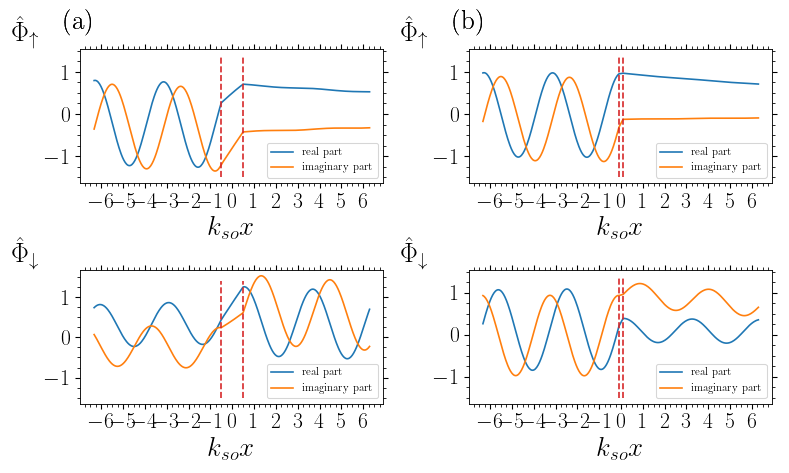

In [215]:
# %matplotlib notebook
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'

font = {'family': "Times New Roman", "size": 25}
# font dict for lables
font2 = {'family': "Times New Roman", "size": 14}

fig, axs = plt.subplots(2, 2, figsize=(10, 6), dpi=100, tight_layout=True, facecolor='white')

y_int = np.arange(-1.5, 1.5, 0.1)

axs_title = ["spin up", "spin down"]
region_lbl = ["(a)", "(b)"]
for i, k in enumerate(res.keys()):
    for j in range(res[k].shape[1]):
        axs[j, i].plot(x_range*np.sqrt(al_r), res[k][:, j].real, label="real part")
        axs[j, i].plot(x_range*np.sqrt(al_r), res[k][:, j].imag, label="imaginary part")
#         axs[j, i].plot(x_range, [np.linalg.norm(res[k][n, j]) for n in range(len(x_range))], label="real part")


        axs[j, i].plot(np.full(len(y_int), -k*np.sqrt(al_r)/2), [i for i in y_int], 
                       linestyle = "dashed",
                       color = 'tab:red')
        axs[j, i].plot(np.full(len(y_int), k*np.sqrt(al_r)/2), [i for i in y_int],
                       linestyle = "dashed",
                       color = 'tab:red')
        
#         axs[j, i].set_title(axs_title[j])
        
        axs[j, i].set_xlabel(r"$k_{so} x$", fontdict=font)
        if j == 0:
            y_label = r"$\hat{\Phi}_\uparrow$"
        else:
            y_label = r"$\hat{\Phi}_\downarrow$"
        axs[j, i].set_ylabel(y_label, loc = 'top', rotation=0, fontdict=font)
        axs[j, i].legend()
#         axs[j, i].grid(True)

        axs[0, i].text(0, 1.2, region_lbl[i], 
                       horizontalalignment='center', 
                       verticalalignment='center',
                       transform=axs[0, i].transAxes, 
                       fontdict = font)

# lines_labels = axs.get_legend_handles_labels()
# # print(lines_labels[0][-1])

# leg = fig.legend(*lines_labels, loc=7, bbox_to_anchor=(0.95, 0.83),  prop=font2)    

from matplotlib import ticker
magior = [1.0, 0.1]
minor = [0.25, 0.025]
for jax in axs:
    for iax in jax:
# for i in range(len(axs)):
#     iax.yticks(fontsize=20)
        iax.tick_params(axis='x', labelsize=20)
        iax.tick_params(axis='y', labelsize=20)
    
        iax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        iax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

        iax.xaxis.set_ticks_position('both')
    
        iax.yaxis.set_major_locator(ticker.MultipleLocator(1))
        iax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
    
#     ValueError: 'bottom' is not a valid value for position; supported values are 'left', 'right', 'both', 'default', 'none'
        iax.yaxis.set_ticks_position('both')
    
        iax.tick_params(which='major', width=1.00, length=5)
        iax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    
    
# plt.savefig(BASE_PATH+SECTION_2+"2interface_wave_function(kso_scale).pdf", transparent = True)
plt.savefig(DIRAC_PAPER_PLOTS+"2interface_wave_function(kso_scale).pdf", transparent = True)
plt.show()

In [49]:
(4.890 - 1.7)/ np.pi

1.0154085369262922